In [1]:
import pathlib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

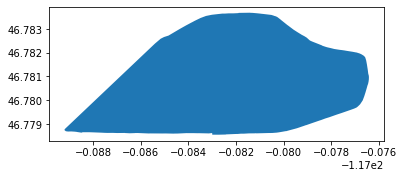

In [2]:
boundaryPath = pathlib.Path.cwd() / "input" / "cookeast_boundary_20190924.geojson"
ce_boundary = gpd.read_file(boundaryPath)
ce_boundary.crs = {"init": "epsg:4326"}
ce_boundary.plot()

In [37]:
inPath = pathlib.Path.cwd() / "working" / "cleaned_data_20200708_P2A1.csv"
df = pd.read_csv(inPath)
gdf = gpd.GeoDataFrame(
    df, geometry = gpd.points_from_xy(df.Longitude, df.Latitude)
).drop(["Latitude", "Longitude"], axis = 1)
gdf.crs = {"init": "epsg:4326"}

gdf.describe()

,ID2,Elevation,TopographicWetnessIndex,RelativeSlopePosition,AnnualGlobalSolarRadiation,DepthFewRoots,DepthNoRoots,RelativeYieldCV,RelativeYieldMean,HasSoilDescription
count,369.000000,369.000000,369.000000,369.000000,369.000000,169.000000,169.000000,369.000000,369.000000,369.000000
mean,189.059621,793.165348,5.993245,0.384599,1702.002084,71.964497,126.639053,0.209722,0.998983,0.495935
std,113.283200,8.495969,1.415197,0.250104,106.979637,29.576353,27.696375,0.075986,0.140639,0.500662
min,1.000000,773.507740,3.950007,0.000000,1453.579712,16.000000,47.000000,0.070753,0.514259,0.000000
25%,93.000000,787.553020,5.103765,0.208310,1626.670044,52.000000,109.000000,0.160471,0.915329,0.000000
50%,185.000000,792.010370,5.725208,0.344200,1683.815430,72.000000,128.000000,0.195218,1.022535,0.000000
75%,277.000000,798.202220,6.354430,0.534797,1809.005005,93.000000,153.000000,0.244780,1.097078,1.000000
max,425.000000,813.390000,14.157762,0.990449,1930.155518,153.000000,153.000000,0.588032,1.475118,1.000000


In [61]:
gdf["RelativeYieldCV"].quantile(0.25)

0.160470533721875

In [105]:
TWI_cutoff = gdf["TopographicWetnessIndex"].quantile(0.5)
AGSR_cutoff = gdf["AnnualGlobalSolarRadiation"].quantile(0.5)
RYCV_25percentile = gdf["RelativeYieldCV"].quantile(0.25)
RYCV_75percentile = gdf["RelativeYieldCV"].quantile(0.75)

gdf_profile = gdf[gdf["HasSoilDescription"] > 0]

gdf_TWI = gdf_profile[(gdf_profile["TopographicWetnessIndex"] < TWI_cutoff)]
gdf_AGSR = gdf_profile[(gdf_profile["AnnualGlobalSolarRadiation"] > AGSR_cutoff)]
gdf_RYCV = gdf_profile[(gdf_profile["RelativeYieldCV"] < RYCV_75percentile) & (gdf_profile["RelativeYieldCV"] > RYCV_25percentile)]

gdf_TWI_AGSR = gdf_profile[(gdf_profile["TopographicWetnessIndex"] < TWI_cutoff) & (gdf_profile["AnnualGlobalSolarRadiation"] > AGSR_cutoff)]
gdf_TWI_AGSR_RYCV = gdf_profile[(gdf_profile["TopographicWetnessIndex"] < TWI_cutoff) & (gdf_profile["AnnualGlobalSolarRadiation"] > AGSR_cutoff) & (gdf_profile["RelativeYieldCV"] < RYCV_75percentile) & (gdf_profile["RelativeYieldCV"] > RYCV_25percentile)]


#gdf_filtered = gdf[gdf["RelativeSlopePosition"] > .35]
print("gdf_TWI: " + str(len(gdf_TWI)))
print("gdf_AGSR: " + str(len(gdf_AGSR)))
print("gdf_TWI_AGSR: " + str(len(gdf_TWI_AGSR)))
print("gdf_RYCV: " + str(len(gdf_RYCV)))
print("gdf_TWI_AGSR_RYCV: " + str(len(gdf_TWI_AGSR_RYCV)))

gdf_TWI: 45
gdf_AGSR: 88
gdf_TWI_AGSR: 20
gdf_RYCV: 90
gdf_TWI_AGSR_RYCV: 9


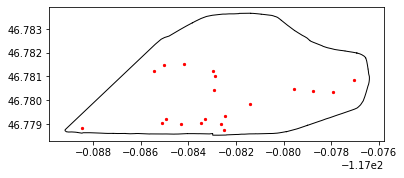

In [106]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
gdf_TWI_AGSR.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()

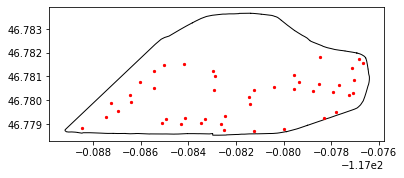

In [107]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
gdf_TWI.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()

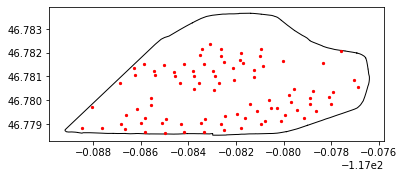

In [108]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
gdf_AGSR.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()

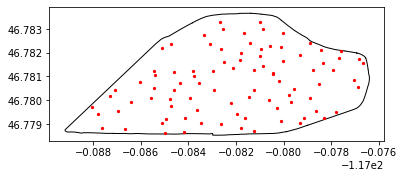

In [109]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
gdf_RYCV.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()

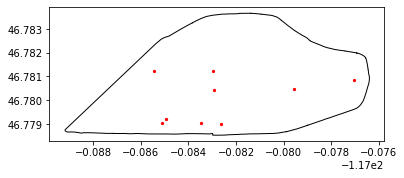

In [110]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
gdf_TWI_AGSR_RYCV.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()

In [111]:
gdf.describe()


,ID2,Elevation,TopographicWetnessIndex,RelativeSlopePosition,AnnualGlobalSolarRadiation,DepthFewRoots,DepthNoRoots,RelativeYieldCV,RelativeYieldMean,HasSoilDescription
count,369.000000,369.000000,369.000000,369.000000,369.000000,169.000000,169.000000,369.000000,369.000000,369.000000
mean,189.059621,793.165348,5.993245,0.384599,1702.002084,71.964497,126.639053,0.209722,0.998983,0.495935
std,113.283200,8.495969,1.415197,0.250104,106.979637,29.576353,27.696375,0.075986,0.140639,0.500662
min,1.000000,773.507740,3.950007,0.000000,1453.579712,16.000000,47.000000,0.070753,0.514259,0.000000
25%,93.000000,787.553020,5.103765,0.208310,1626.670044,52.000000,109.000000,0.160471,0.915329,0.000000
50%,185.000000,792.010370,5.725208,0.344200,1683.815430,72.000000,128.000000,0.195218,1.022535,0.000000
75%,277.000000,798.202220,6.354430,0.534797,1809.005005,93.000000,153.000000,0.244780,1.097078,1.000000
max,425.000000,813.390000,14.157762,0.990449,1930.155518,153.000000,153.000000,0.588032,1.475118,1.000000


In [112]:
gdf_TWI_AGSR_RYCV.describe()

,ID2,Elevation,TopographicWetnessIndex,RelativeSlopePosition,AnnualGlobalSolarRadiation,DepthFewRoots,DepthNoRoots,RelativeYieldCV,RelativeYieldMean,HasSoilDescription
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,127.888889,795.534902,4.543627,0.447306,1796.390232,68.000000,120.888889,0.187705,0.891870,1.0
std,91.444579,7.798349,0.354339,0.242576,71.012020,31.650434,32.389985,0.019696,0.150248,0.0
min,27.000000,784.904290,4.005352,0.133473,1698.022949,17.000000,59.000000,0.161277,0.586861,1.0
25%,33.000000,790.828530,4.358179,0.302828,1709.631104,57.000000,100.000000,0.172930,0.808094,1.0
50%,159.000000,794.086420,4.625368,0.394759,1826.739502,81.000000,127.000000,0.189759,0.915495,1.0
75%,223.000000,796.614090,4.881091,0.478502,1840.411255,93.000000,153.000000,0.196057,1.013344,1.0
max,233.000000,810.279980,4.921764,0.914475,1877.192139,100.000000,153.000000,0.227067,1.072252,1.0


In [94]:
foo = gdf_TWI_AGSR_RYCV.copy()
foo["Latitude"] = foo["geometry"].y
foo["Longitude"] = foo["geometry"].x
foo.drop(columns=["geometry"]).to_csv("foo.csv", index=False)